# Step 1. Get List of Tickers to Trade

- Currently just picking one stock

In [2]:
import yfinance as yf

# ticker='NVDA'
# start_date='2015-04-01'
# end_date='2018-02-15'

ticker = 'MSFT'
start_date = '2020-01-01'
end_date = '2021-01-01'
df = yf.download(ticker, start=start_date, end=end_date)
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,221.419998,223.610001,221.199997,222.750000,217.364563,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,219.521133,17933500
2020-12-29,226.309998,227.179993,223.580002,224.149994,218.730698,17403200
2020-12-30,225.229996,225.630005,221.470001,221.679993,216.320419,20272300
2020-12-31,221.699997,223.000000,219.679993,222.419998,217.042542,20942100


# Step 2. Calculate Volatility and Momentum

### Ways to Calculate Volatility

* VIX

* Bollinger Bands (increase in distance between upper and lower band)

* Historical Volatility (standard deviation of percent change prices across time)

* Implied Volatility (From options table)


### Ways to Calculate Momentum

* Monte Carlo

* MACD

* Heikin-Ashi_Candlestick

* Parabolic SAR

* RSI

* Shooting Star

In [3]:
# Volatility
import pandas as pd
from Tools.OptionsStrategies.VIX_Calculator.calculator import *
from Tools.TechnicalIndicators.BollingerBandsPatternRecognition.backtest import *

# VIX
# cme_holidays = pd.read_csv('Data/cme_holidays.csv') # used for vix
# also need treasury yield curve rates
# Also need options data


# Bollinger Bands
# Need to get one minute frequency currency-pair dataset for backtest

Monte Carlo


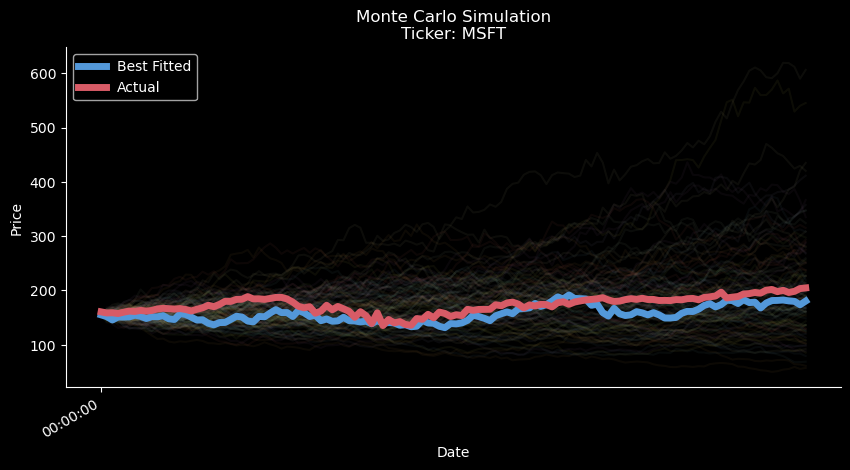

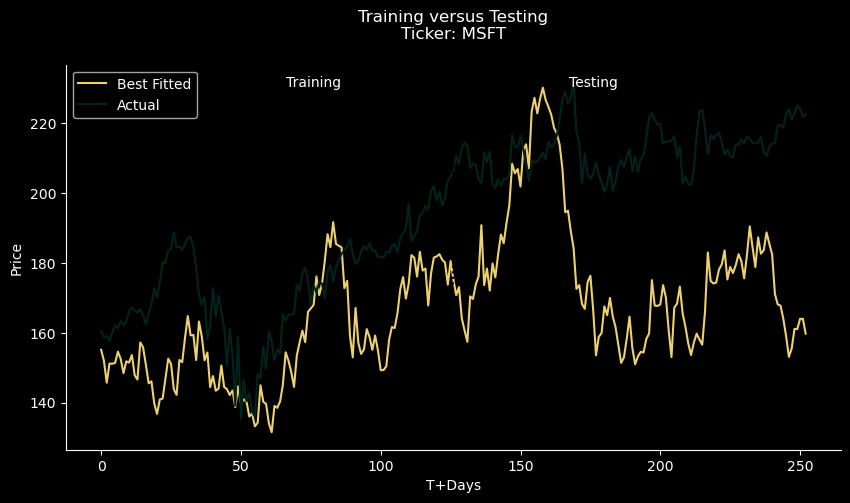

MACD Oscillator


/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/MACD_Oscillator/backtest.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['positions'][ma1:]=np.where(signals['ma1'][ma1:]>=signals['ma2'][ma1:],1,0)


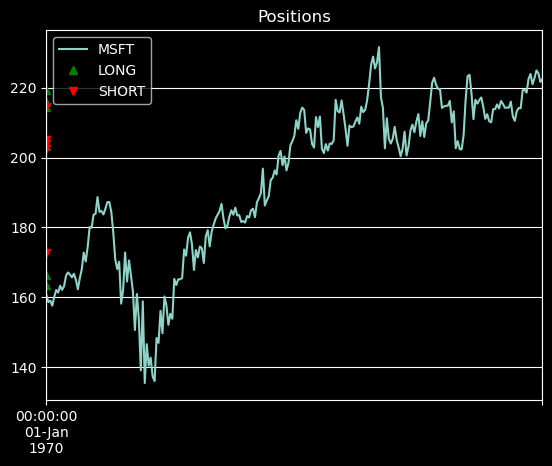

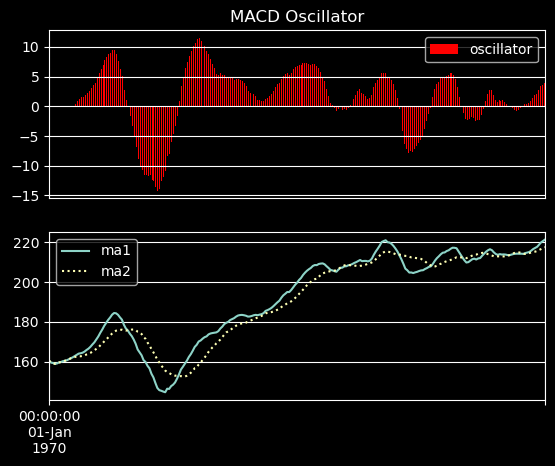

Awesome Oscillator


/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/AwesomeOscillator/oscillator.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['macd positions'][ma1:]=np.where(signals['macd ma1'][ma1:]>=signals['macd ma2'][ma1:],1,0)


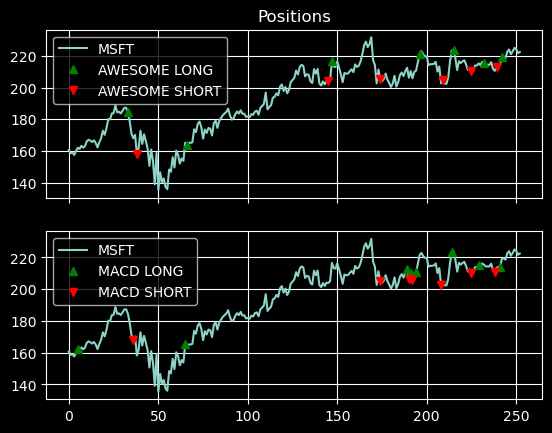

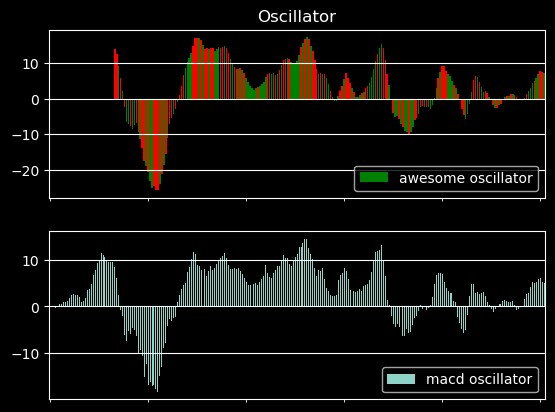

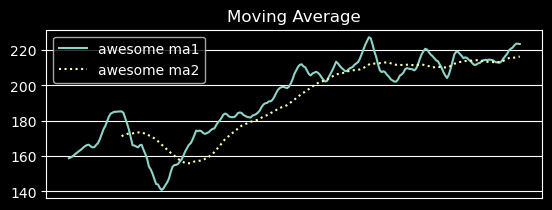

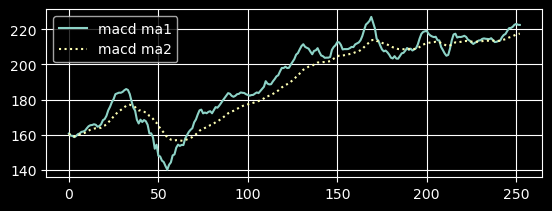

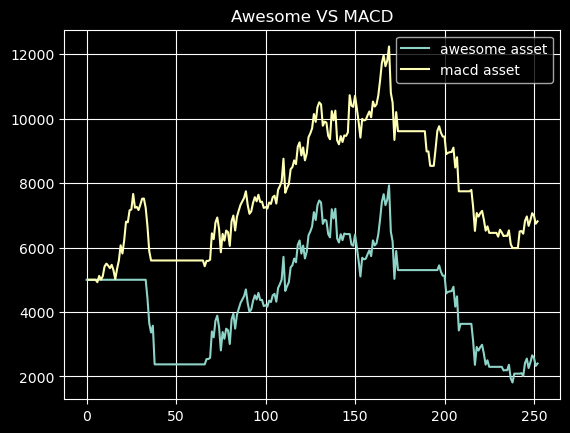

   0  awesome sharpe  macd sharpe  awesome mdd  macd mdd
0  0       -7.165644       8.8646    -0.771191         0
Heiken-Ashi Candlesticks


/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/Heikin_Ashi_Candlestick/backtest.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HA open'][0]=df['Open'][0]


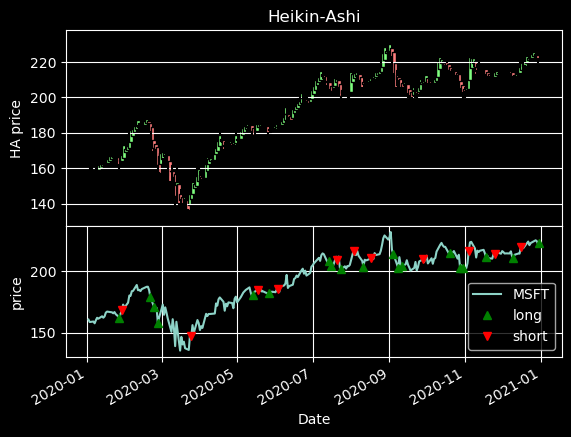

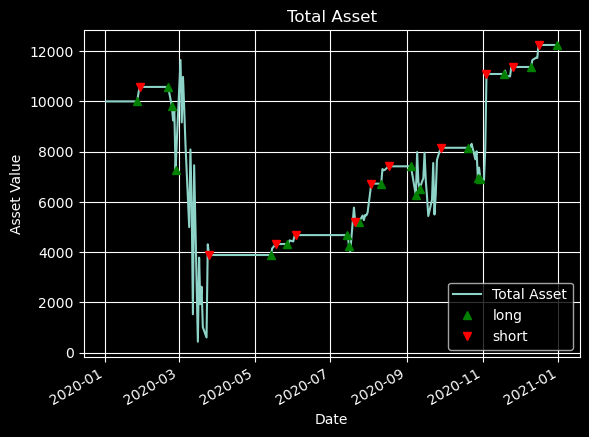

[*********************100%%**********************]  1 of 1 completed
       CAGR  portfolio return  benchmark return  sharpe ratio   
0  0.000801            0.2246          0.157612      0.000329  \

   maximum drawdown  calmar ratio  omega ratio  sortino ratio   
0         -0.962565     -0.000832     1.304878        0.00076  \

   numbers of longs  numbers of shorts  numbers of trades   
0                19                 11                 30  \

   total length of trades  average length of trades  profit per trade  
0                      83                  2.766667         74.866638  
Parabolic SAR


/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/Heikin_Ashi_Candlestick/backtest.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['CAGR'][0]=growth_rate
/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/Heikin_Ashi_Candlestick/backtest.py:326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['portfolio return'][0]=portfolio['total asset'].iloc[-1]/capital0-1
/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/Heikin_Ashi_Candlestick/backtest.py:355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



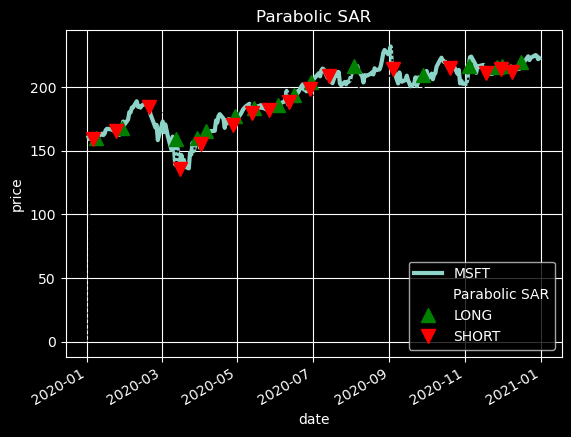

RSI


/Users/rileyoest/VS_Code/AlphaScratch/Project/Tools/TechnicalIndicators/RSI_PatternRecognition/backtest.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'][n:]=method(df['Close'],n=14)


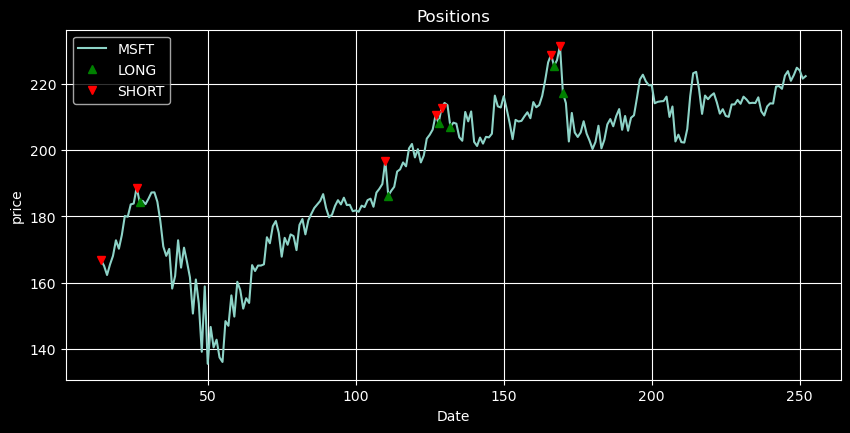

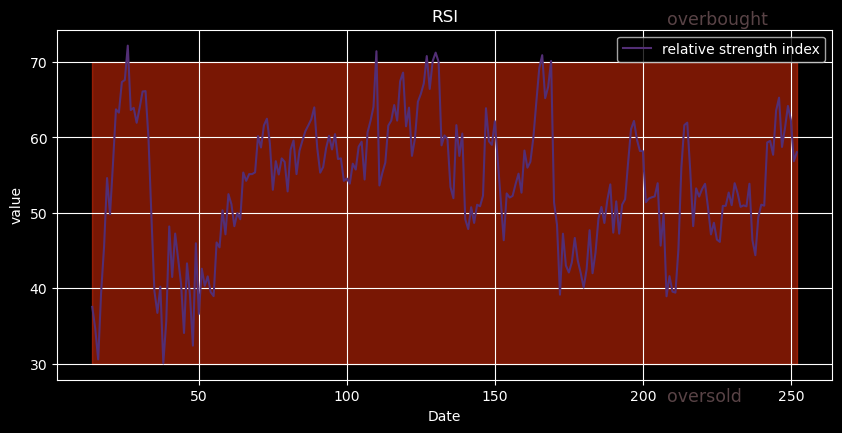

Shooting Star


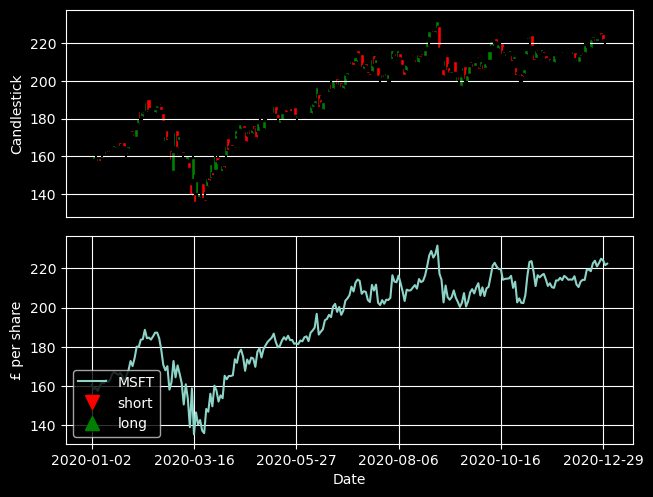

In [21]:
# Momentum

from Tools.QuantamentalAnalysis.MonteCarlo.backtest import *
print("Monte Carlo")
df.index = pd.to_datetime(df.index)
forecast_horizon, predicted, choice = monte_carlo(df)
plot(df, forecast_horizon, predicted, choice, ticker)

from Tools.TechnicalIndicators.MACD_Oscillator.backtest import *
print("MACD Oscillator")
ma1 = 12
ma2 = 26
slicer = 0 # see performance for entire year
new = signal_generation(df, macd, ma1, ma2)
new = new[slicer:]
plot(new, ticker)

from Tools.TechnicalIndicators.AwesomeOscillator.oscillator import *
print("Awesome Oscillator")
# awesome oscillator uses 5 lags as short ma
# 34 lags as long ma
ma1 = 5
ma2 = 34
slicer = 0 # see performance for entire year
signals = signal_generation(df, ewmacd, ma1, ma2)
sig = awesome_signal_generation(signals, awesome_ma)
new = sig[slicer:]
plot(new, ticker)

# Testing portfolio, profit, and stats from AwesomeOscillator/oscillator.py
portfo=portfolio(sig)
profit(portfo)
stats(portfo)

from Tools.TechnicalIndicators.Heikin_Ashi_Candlestick.backtest import *
print("Heiken-Ashi Candlesticks")


def candlestick(df, ax=None, titlename='', highcol='High', lowcol='Low',
                opencol='Open', closecol='Close', xcol='Date',
                colorup=(1, 0, 0), colordown=(0, 1, 0), **kwargs):  
    #bar width
    #use 0.6 by default
    #dif=[(-3+i)/10 for i in range(7)]
    # Adjusting bar width
    dif = [(-3 + i) / 3 for i in range(7)]  # Change 10 to a smaller number like 5

    
    if not ax:
        ax=plt.figure(figsize=(10,5)).add_subplot(111)
    
    #construct the bars one by one
    for i in range(len(df)):
        
        #width is 0.6 by default
        #so 7 data points required for each bar
        x=[i+j for j in dif]
        y1=[df[opencol].iloc[i]]*7
        y2=[df[closecol].iloc[i]]*7

        barcolor=colorup if y1[0]>y2[0] else colordown
        
        #no high line plot if open/close is high
        if df[highcol].iloc[i]!=max(df[opencol].iloc[i],df[closecol].iloc[i]):
            
            #use generic plot to viz high and low
            #use 1.001 as a scaling factor
            #to prevent high line from crossing into the bar
            plt.plot([i,i],
                     [df[highcol].iloc[i],
                      max(df[opencol].iloc[i],
                          df[closecol].iloc[i])*1.001],c='k',**kwargs)
           
    
        #same as high
        if df[lowcol].iloc[i]!=min(df[opencol].iloc[i],df[closecol].iloc[i]):             
            
            plt.plot([i,i],
                     [df[lowcol].iloc[i],
                      min(df[opencol].iloc[i],
                          df[closecol].iloc[i])*0.999],c='k',**kwargs)
            
        
        #treat the bar as fill between
        # plt.fill_between(x,y1,y2,
        #                  edgecolor='k',
        #                  facecolor=barcolor, alpha = 1, **kwargs)
        # In the plt.fill_between() function, change the edgecolor parameter:
        plt.fill_between(x, y1, y2, edgecolor='black', facecolor=barcolor, alpha=1, **kwargs)


    #only show 5 xticks
    plt.xticks(range(0,len(df),len(df)//5),df[xcol][0::len(df)//5].dt.date)
    plt.title(titlename)

"""
plot()

backtest result
"""
def plot(df,ticker):    
    
    df.set_index(df['Date'],inplace=True)
    
    #first plot is Heikin-Ashi candlestick
    #use candlestick function and set Heikin-Ashi O,C,H,L
    ax1=plt.subplot2grid((200,1), (0,0), rowspan=120,ylabel='HA price')
    candlestick(df,ax1,titlename='',highcol='HA high',lowcol='HA low',
                opencol='HA open',closecol='HA close',xcol='Date',
                colorup=(1, 0.5, 0.5), colordown=(0.5, 1, 0.5))  # Adjusting color scheme
    
    plt.grid(True)
    plt.xticks([])
    plt.title('Heikin-Ashi')


    #the second plot is the actual price with long/short positions as up/down arrows
    ax2=plt.subplot2grid((200,1), (120,0), rowspan=80,ylabel='price',xlabel='')
    df['Close'].plot(ax=ax2,label=ticker)

    #long/short positions are attached to the real close price of the stock
    #set the line width to zero
    #thats why we only observe markers
    ax2.plot(df.loc[df['signals']==1].index,df['Close'][df['signals']==1],marker='^',lw=0,c='g',label='long')
    ax2.plot(df.loc[df['signals']<0].index,df['Close'][df['signals']<0],marker='v',lw=0,c='r',label='short')

    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

stls = 3
slicer = 0

trading_signals=signal_generation(df,heikin_ashi,stls)

viz=trading_signals[slicer:]
plot(viz,ticker)

portfolio_details=portfolio(viz)
profit(portfolio_details)

stats(portfolio_details,trading_signals,start_date,end_date)

from Tools.TechnicalIndicators.ParabolicSAR.backtest import *
print("Parabolic SAR")
slicer = 0

df_copy = df.copy()
del df_copy['Adj Close']
del df_copy['Volume']

df_copy.reset_index(inplace=True, drop=False) 
df_copy.rename(columns={'Date': 'date'}, inplace=True)
new=signal_generation(df_copy,parabolic_sar)

#convert back to time series for plotting
#so that we get a date x axis
new.set_index(new['date'],inplace=True)

#shorten our plotting horizon and plot
new=new[slicer:]
plot(new,ticker) 


from Tools.TechnicalIndicators.RSI_PatternRecognition.backtest import *
print("RSI")
new = signal_generation(df, rsi, n = 14)
plot(new, ticker)

from Tools.TechnicalIndicators.ShootingStar.backtest import *
print("Shooting Star")
"""
candlestick()

create candlesticks
"""
def candlestick(df,ax=None,highlight=None,titlename='',
                highcol='High',lowcol='Low',
                opencol='Open',closecol='Close',xcol='Date',
                colorup='r',colordown='g',highlightcolor='y',
                **kwargs):  
    
    #bar width
    #use 0.6 by default
    dif=[(-3+i)/3 for i in range(7)]
    
    if not ax:
        ax=plt.figure(figsize=(10,5)).add_subplot(111)
    
    #construct the bars one by one
    for i in range(len(df)):
        
        #width is 0.6 by default
        #so 7 data points required for each bar
        x=[i+j for j in dif]
        y1=[df[opencol].iloc[i]]*7
        y2=[df[closecol].iloc[i]]*7

        barcolor=colorup if y1[0]>y2[0] else colordown
        
        #no high line plot if open/close is high
        if df[highcol].iloc[i]!=max(df[opencol].iloc[i],df[closecol].iloc[i]):
            
            #use generic plot to viz high and low
            #use 1.001 as a scaling factor
            #to prevent high line from crossing into the bar
            plt.plot([i,i],
                     [df[highcol].iloc[i],
                      max(df[opencol].iloc[i],
                          df[closecol].iloc[i])*1.001],c='k',**kwargs)
    
        #same as high
        if df[lowcol].iloc[i]!=min(df[opencol].iloc[i],df[closecol].iloc[i]):             
            
            plt.plot([i,i],
                     [df[lowcol].iloc[i],
                      min(df[opencol].iloc[i],
                          df[closecol].iloc[i])*0.999],c='k',**kwargs)
        
        #treat the bar as fill between
        plt.fill_between(x,y1,y2,
                         edgecolor='k',
                         facecolor=barcolor, alpha = 1, **kwargs)
        
        if highlight:
            if df[highlight].iloc[i]==-1:
                plt.fill_between(x,y1,y2,
                         edgecolor='k',
                         facecolor=highlightcolor,**kwargs)

    #only show 5 xticks
    plt.xticks([])
    plt.grid(True)
    plt.title(titlename)

"""
plot()

backtest result
"""
def plot(data,name):   
    
    #first plot is candlestick to showcase
    ax1=plt.subplot2grid((250,1),(0,0),
                         rowspan=120,
                         ylabel='Candlestick')
    candlestick(data,ax1,
                highlight='signals',
                highlightcolor='#FFFF00')

    #the second plot is the actual price 
    #with long/short positions as up/down arrows
    ax2=plt.subplot2grid((250,1),(130,0),
                         rowspan=120,
                         ylabel='£ per share',
                         xlabel='Date')
    ax2.plot(data.index,
             data['Close'],
             label=name)

    #long/short positions are attached to 
    #the real close price of the stock
    #set the line width to zero
    #thats why we only observe markers
    ax2.plot(data.loc[data['signals']==-1].index,
             data['Close'].loc[data['signals']==-1],
             marker='v',lw=0,c='r',label='short',
             markersize=10)
    ax2.plot(data.loc[data['signals']==1].index,
             data['Close'].loc[data['signals']==1],
             marker='^',lw=0,c='g',label='long',
             markersize=10)

    #only show five tickers
    plt.xticks(range(0,len(data),len(data)//5),
               data['Date'][0::len(data)//5].dt.date)
    
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.tight_layout(pad=0.1)
    plt.show()


df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy['Date']=pd.to_datetime(df_copy['Date'])

new = signal_generation(df_copy, shooting_star)

plot(new, ticker)


# Step 3. Evaluate (Volatility X Momentum)